In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

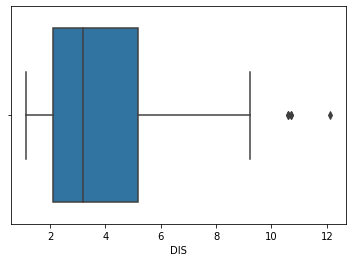

In [10]:
sns.boxplot(x=boston_df['DIS'])

Z-Score

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [21]:
from scipy import stats
boston_df_o = pd.DataFrame(boston.data)
z = np.abs(stats.zscore(boston_df_o))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


In [12]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

Don’t be confused by the results. The first array contains the list of row numbers and second array respective column numbers, which mean z[55][1] have a Z-score higher than 3.

In [22]:
print(z[55][1])

3.375038763517309


Removal of outliers

In [27]:
boston_df_o2 = boston_df_o[(z < 3).all(axis=1)]

In [28]:
boston_df_o.shape

(506, 13)

In [30]:
boston_df_o2.shape

(415, 13)

IQR score

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In [23]:
boston_df_o1 = pd.DataFrame(boston.data)
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64


In [34]:
print(((boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))))

        0      1      2      3      4   ...     8      9      10     11     12
0    False  False  False  False  False  ...  False  False  False  False  False
1    False  False  False  False  False  ...  False  False  False  False  False
2    False  False  False  False  False  ...  False  False  False  False  False
3    False  False  False  False  False  ...  False  False  False  False  False
4    False  False  False  False  False  ...  False  False  False  False  False
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
501  False  False  False  False  False  ...  False  False  False  False  False
502  False  False  False  False  False  ...  False  False  False  False  False
503  False  False  False  False  False  ...  False  False  False  False  False
504  False  False  False  False  False  ...  False  False  False  False  False
505  False  False  False  False  False  ...  False  False  False  False  False

[506 rows x 13 columns]


In [33]:
((boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))).sum()

0     66
1     68
2      0
3     35
4      0
5     30
6      0
7      5
8      0
9      0
10    15
11    77
12     7
dtype: int64

Removal of outliers

In [31]:
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) |(boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
boston_df_out.shape

(274, 13)